In [45]:
try:
    # MAKE ALL THE MODULES AVAILABLE
    import sys
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    from re import sub
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    from nltk.sentiment import SentimentIntensityAnalyzer
    from nltk.util import ngrams
    from nltk.tokenize import word_tokenize
    from nltk import pos_tag
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
    from sklearn.pipeline import Pipeline
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from sklearn.ensemble import RandomForestClassifier

    from wordcloud import WordCloud
    
    print("All the Modules are Successfully Imported")
except Exception as e:
    print("Enable to import all the necessary Modules---", e)
    # sys.exit()

All the Modules are Successfully Imported


In [32]:
class VulgurPrevent():
    ''' Constructor Initialization '''
    def __init__(self) -> None:
        '''
        wordlist : Set of Vulgur Words or Phrases
        '''
        self.wordlist = pd.read_csv("blockwords.csv")

    def __str__(self) -> str:
        return self.__class__.__name__

    def profanity_filter(self, text):
        blockwords = self.wordlist.blockword.tolist()
        data = text.split(".")
        brokenstr = []
        for text1 in data:
            brokenstr.extend(text1.split())
        badwordmask = '********************************************'
        newtext = ''
        for word in brokenstr:
            if word in blockwords:
                newtext = text.replace(word, badwordmask[:len(word)])
        return newtext

# VulgurPrevent()

In [33]:
'''
Pre-processing of the Text Data
'''

class PreProcessing():
    ''' Constructor Initialization '''
    def __init__(self):
        self.sub = sub
        self.stemmer = WordNetLemmatizer()
        self.stopwords = list(set(stopwords.words('english')))
        

    def __str__(self):
        return self.__class__.__name__

    def clean_text(self, text):
        if isinstance(text, str):
            ''' Pre-Processing of the text '''
            text = self.sub(r"can't", "cannot", text)
            text = self.sub(r"won't", "will not", text)
            text = self.sub(r"want's", "wants", text)
            text = self.sub(r"when'd", "when did", text)
            text = self.sub(r"can'tif", "cannot if", text)
            text = self.sub(r"y'know", "you know", text)
            text = self.sub(r"y'all", "you all", text)
            text = self.sub(r"y'think", "you think", text)
            text = self.sub(r"d'you", "do you", text)
            text = self.sub(r"\'s", " is", text)
            text = self.sub(r"\'d", " had", text)
            text = self.sub(r"n't", " not", text)
            text = self.sub(r"\'ve", " have", text)
            text = self.sub(r"\'ll", " will", text)
            text = self.sub(r"\'m", " am", text)
            text = self.sub(r"\'re", " are", text)
            text = self.sub(r"\'ve", " have", text)
            text = self.sub(r"can’t", "cannot", text)
            text = self.sub(r"won’t", "will not", text)
            text = self.sub(r"want’s", "wants", text)
            text = self.sub(r"when’d", "when did", text)
            text = self.sub(r"can’tif", "cannot if", text)
            text = self.sub(r"y’know", "you know", text)
            text = self.sub(r"y’all", "you all", text)
            text = self.sub(r"y’think", "you think", text)
            text = self.sub(r"d’you", "do you", text)
            text = self.sub(r"\’s", " is", text)
            text = self.sub(r"\’d", " had", text)
            text = self.sub(r"n’t", " not", text)
            text = self.sub(r"\’ve", " have", text)
            text = self.sub(r"\’ll", " will", text)
            text = self.sub(r"\’m", " am", text)
            text = self.sub(r"\’re", " are", text)
            text = self.sub(r"\’ve", " have", text)
            text = text.replace(":"," ")
            text = text.replace("?","")
    
            
            # Removal of StopWords
            text = VulgurPrevent().profanity_filter(text)
    
            return text

    # Stemming of words
    def word_stemmer(self, text):
        if isinstance(text, str):
            text = " ".join([self.stemmer.lemmatize(word, pos="v") for word in text.split(" ")])
            return text
        else:
            return ""
            
    # Remove Punctuations from String
    def remove_punctuations(self, text):
        if isinstance(text, str):
            return self.sub(r'[^\w\s]', '', text)
        else:
            return ""

    # Fill Missing Values with empty string
    def missing_values(self, reviews):
        if isinstance(reviews, str):
            return reviews if reviews != "" else ""
        else:
            return ""



Accuracy: 75.81%

Confusion Matrix:
[[ 749  194]
 [ 380 1050]]
****************************************************************************************************


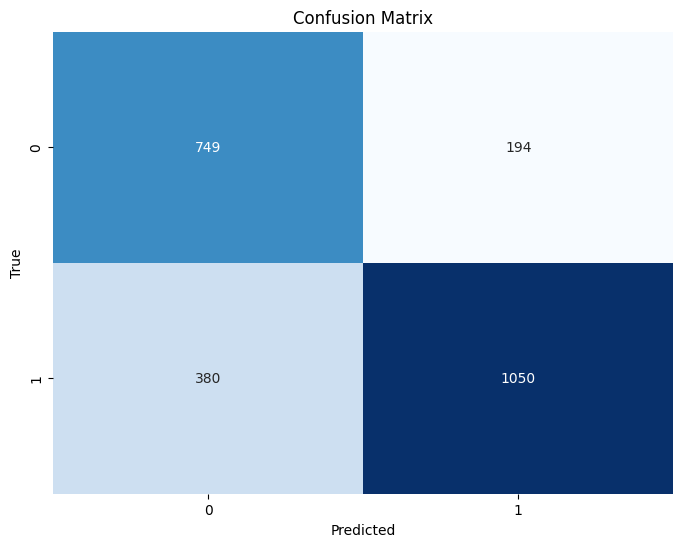

Random Forest Report Without Upsampling:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       943
           1       0.84      0.73      0.79      1430

    accuracy                           0.76      2373
   macro avg       0.75      0.76      0.75      2373
weighted avg       0.77      0.76      0.76      2373



(RandomForestClassifier(random_state=42), TfidfVectorizer())

In [36]:
class Classifier:
    def __init__(self) -> None:
        self.review_data = pd.read_csv("reviews.csv")
        self.tfidfvec = TfidfVectorizer(lowercase=True)

    def __str__(self):
        return self.__class__.__name__

    def cl_dump(self):
        ''' Classifier for the Sentiment Analyzer '''
        self.review_data = self.review_data.fillna("")

        X = self.review_data['keyword']
        y = self.review_data['rating'].apply(lambda x: 1 if x == 'pos' else 0)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        # Vectorize the text data using TdIdf Vectorization
        X_train_vectorized = self.tfidfvec.fit_transform(X_train)
        X_test_vectorized = self.tfidfvec.transform(X_test)

        # Support Vector Machine Classifier
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(X_train_vectorized, y_train)

        y_pred = clf.predict(X_test_vectorized)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy:.2%}')
        print()

        # Generate a confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        print('Confusion Matrix:')
        print(conf_matrix)
        print("*"*100)

        # Create a heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
        
        # Add labels and title
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Confusion Matrix")
        
        # Show the plot
        plt.show()

        print("Random Forest Report Without Upsampling:")
        print(classification_report(y_test, y_pred))

        return clf, self.tfidfvec

    def sentiment(self, review, clf=None, tfidfvec=None):
        if not isinstance(review, list):
            review = [review]

        if clf is None:
            clf, tfidfvec = self.cl_dump()

        # Convert the Review into vectorized form for machine learning model
        review_vectorized = tfidfvec.transform(review)

        review_pred = clf.predict(review_vectorized)

        return review_pred[0]

# obj = Classifier()
# obj.cl_dump()
# review = "The way of talking is ok but and quality of product is also good. But as for the money it's too costly. "
# print(obj.sentiment(review))

,keyword,rating
0,battery is lasting for a very short period cha...,pos
1,excels,pos
2,goood,pos
3,gooood,pos
4,grace,pos
5,grand,pos
6,great,pos
7,gusto,pos
8,gutsy,pos
9,handy,pos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   keyword  7907 non-null   object
 1   rating   7907 non-null   object
dtypes: object(2)
memory usage: 123.7+ KB
None


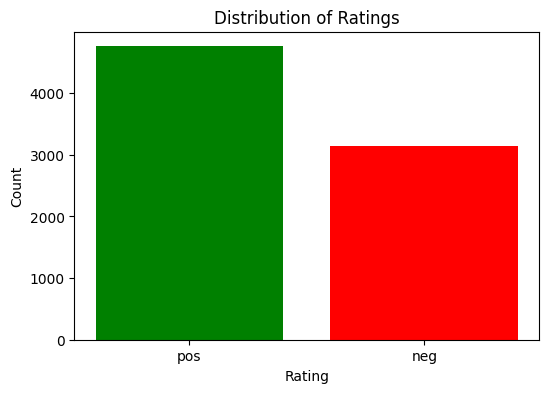

In [27]:
df = pd.read_csv("reviews.csv")
df = df[['keyword','rating']]
df['keyword'] = df['keyword'].astype(str)
print(df.info())

# Filter rows to keep only 'pos' and 'neg' ratings
df = df[df['rating'].isin(['pos', 'neg'])]

# Count the occurrences of each category
rating_counts = df['rating'].value_counts()

## Function to calculate word count
def count_words(text):
    words = text.split()
    return len(words)

# Apply the function to create the 'word_count' column
df['word_count'] = df['keyword'].apply(count_words)

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(rating_counts.index, rating_counts.values, color=['green', 'red'])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


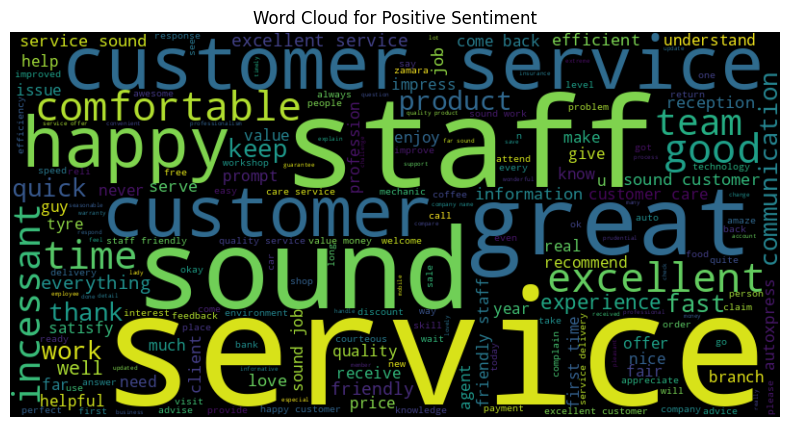

In [23]:
# Create a Word Cloud for positive sentiment words
df = pd.read_csv("reviews.csv")
positive_text = " ".join(text for text in df[df['rating'] == 'pos']['keyword'])
wordcloud = WordCloud(width=800, height=400).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Sentiment")
plt.show()


In [ ]:
clf, tfidfvec = Classifier().cl_dump()

In [53]:
# Split of Sentence into multiple lines sentences
def sent_part(text):
    return [i.strip() for i in text.replace(",", ".").replace("but", ".").replace("and", ".").lower().split(".") if i != ""]

processing = PreProcessing()

sentence = processing.clean_text(sentence)
sentence = processing.remove_punctuations(sentence)
sentence = processing.word_stemmer(sentence)
sentence = processing.remove_punctuations(sentence)
sentence = processing.missing_values(sentence)


#sentence = "The way of talking is ok but and quality of product is also good. But as for the money it's too costly. "
# sentence = "I was quite disappointed with my visit. The food was mediocre, and the service left much to be desired. I probably won't return."

sentence = "The way of talking of staff is not efficient"
sentence1 = "The quality of product is good but communication reports are bad"
sentence2 = "Support staff is understanding and co-operative"

li = []
for i in li:
    sentence_sentiment = Classifier().sentiment(sentence, clf=clf, tfidfvec=tfidfvec)
    part_sentences = [item for item in sent_part(sentence) if item != ""]
    
    stag_df = pd.read_csv("stagwords.csv")
    stag_data = stag_df['stagword'].values.tolist()
    
    well_done = []
    improvement = []
    
    for phrase in part_sentences:
        polarity = Classifier().sentiment(phrase, clf=clf, tfidfvec=tfidfvec)
        
        if polarity == 1:
            flag = 1
        else:
            flag = 0
            
        tokens = word_tokenize(phrase)
        pos_tags = pos_tag(tokens)
        nouns = [word for word, pos in pos_tags if (pos in ['NN', 'NNS'])]
        for word in nouns:
            try:
                keys = stag_df[stag_df['stagword'] == word]['rate_param_id'].tolist()
                if len(keys) != 0:
                    for quality in keys:
                        if flag and quality not in well_done:                        
                            well_done.append(quality)
                        elif (not flag) and (quality not in improvement):
                            improvement.append(quality)
            except Exception as ex:
                pass
    
    print(sentence)
    print("Performing Well :",well_done)
    print("Needs Improvements :",improvement)
    sentence_sentiment = "Positive" if sentence_sentiment else "Negative"
    print("Sentiment of the Sentence : ",sentence_sentiment)

The way of talking of staff is not efficient
Performing Well : []
Needs Improvements : ['Quality of staff']
Sentiment of the Sentence :  Negative
